In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
#print(df.head())

In [ ]:
# view dimensions of dataset
df.shape

(337, 18)

In [ ]:
# let's preview the dataset
df.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,3,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0
1,3,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0
2,3,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
3,4,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,4,0,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0


In [ ]:
df.columns

Index(['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headace',
       'bitter_tongue', 'vomitting', 'diarrhea', 'Convulsion', 'Anemia',
       'jundice', 'cocacola_urine', 'hypoglycemia', 'prostraction',
       'hyperpyrexia', 'severe_maleria'],
      dtype='object')

In [ ]:
df['severe_maleria'].value_counts()

0    221
1    116
Name: severe_maleria, dtype: int64

In [ ]:
#STEP 2: DROP IRRELEVANT DATA
df.drop(['age'], axis=1, inplace=True)
df.drop(['sex'], axis=1, inplace=True)
df.drop(['severe_maleria'], axis=1, inplace=True)

In [ ]:
x_df = df.drop('severe_maleria', axis=1)
y_df = df['severe_maleria']

KeyError: ignored

In [ ]:
x = x_df.to_numpy()
y = y_df.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(2, input_dim=17, activation='relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['acc'])
#cnn_model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['acc'])
print(model.summary())


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2)                 36        
                                                                 
 dense_37 (Dense)            (None, 1)                 3         
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train ,verbose=1, epochs=30,
                    validation_data=(X_test, y_test))


Epoch 1/30
8/8 [==============================] - 1s 30ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 5/30
8/8 [==============================] - 0s 10ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 7/30
8/8 [==============================] - 0s 11ms/step - loss: 8.4017 - acc: 0.4553 - val_loss: 7.8637 - val_acc: 0.4902
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 8.4017 - acc: 0.4553 - val_los

In [ ]:
prediction_test = model.predict(X_test)
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

4/4 [==============================] - 0s 4ms/step
[1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0] [[1.1072869 ]
 [0.940114  ]
 [1.0701889 ]
 [1.207641  ]
 [0.845731  ]
 [1.2397153 ]
 [1.0089093 ]
 [0.74985886]
 [0.57694286]
 [0.3001391 ]
 [0.48546255]
 [1.9551443 ]
 [0.04288496]
 [0.24104717]
 [0.1669047 ]
 [1.1902541 ]
 [1.8260132 ]
 [0.44968593]
 [0.04288496]
 [0.5498209 ]
 [0.10376657]
 [0.3275046 ]
 [0.439295  ]
 [0.5472387 ]
 [0.40972096]
 [1.5876842 ]
 [0.18411934]
 [1.6148831 ]
 [0.6833453 ]
 [0.36162692]
 [1.1920996 ]
 [0.04288496]
 [0.44805405]
 [0.29718056]
 [0.25384247]
 [1.0688739 ]
 [1.6606913 ]
 [0.12162861]
 [0.5999602 ]
 [0.3131612 ]
 [0.06774813]
 [0.33842054]
 [0.9847517 ]
 [1.0473698 ]
 [0.67787015]
 [0.49105498]
 [0.89170575]
 [1.0401876 ]
 [1.0019588 ]
 [0.38034695]
 [1.2455163 ]
 [0.04288496]
 [0.8864373 ]

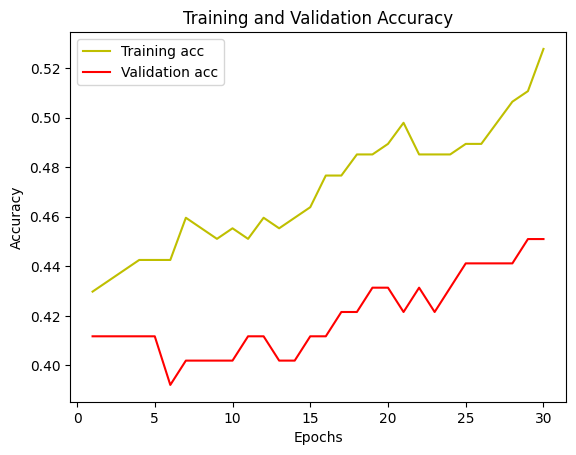

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

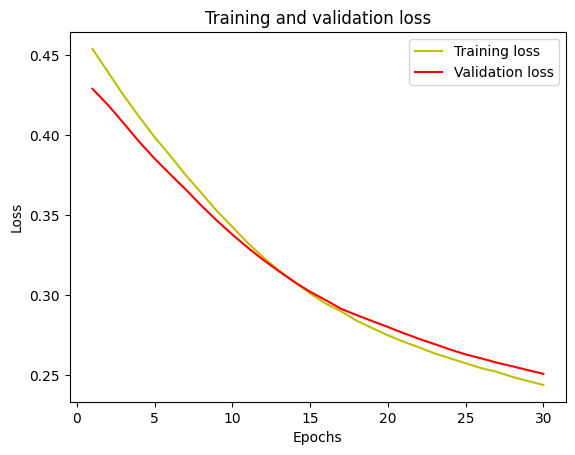

In [ ]:


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()